In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mrjobs as mr


### Homework 4

Copy this notebook. Rename it as: YOURNAME-HW4-mapreduce-XX

with your name replacing YOURNAME and the xx replaced with the date you submit or copy this HW.

.

Upload your completed jupyter notebook to elearning site as your homework submission. Do not put this notebook on your github.


Do all the homeworks problems below:
As noted doing the homework gets a 3 out of 5. To do more create tutorials on how to use Map reduce for different analysis that were not assigned in this HW.

Use the data+shakes.nonpunc.txt file as the source of you analysis in this homework

##Homework 4.1
 A bigram is the combination of words.  Find the 10 most common bigrams from the text.  Order counts in the bigram combination for example "in the" is not the same bigram as "the in"



In [131]:
import pip    
def install(package):
   pip.main(['install', package])

install('mrjob')
install('nltk')

You are using pip version 7.0.3, however version 7.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Contents

The format of the Assignment is as follows:

1) Each Question has MapReduce python file(which calculates bigrams/trigrams) and an additional python file(runner.py) to run corresponding MapReduce file and additional processing such as displaying top 10 results.

2) The Runner program take inputfile as commandline argument and execute the map reduce job on that particular file.Here for all questions the textfile used was 'bible+shakes.nopunc.txt'

3) As the inputfile has multiple lines, while processing bigrams the last word from previous line is appended to next line, in order to acheive the results similar to processing file which has single line.A similar logic for trigrams, where the last two words from previous line was appended to next line.

4) All the runner.py files are same,they differ only by map reduce job they execute.I tried to use only one runner.py  by providing mapreduce job as command line argument along with the inputfile.But unfortunately I couldn't finish that.

5) Assuming that input file is clean, no additional processing is done.

6) For 4.4 to draw the graph, calculated mono,bi and trigrams for a portion of input file.


In [264]:
%%file MRBiGramCount.py   

#The MapReduce Job for calucalting bigrams.

from mrjob.job import MRJob
from mrjob.step import MRStep
import re
import nltk


lastWord=None

class MRBiGramCount(MRJob):

    
    def mapper(self, _, line):
        if len(line.strip()) != 0 :
            global lastWord
            if lastWord is None:
                lastWord = ""
            updatedline=lastWord+" "+line
            newword=nltk.word_tokenize(updatedline)
            for word in nltk.bigrams(newword):
                yield (word, 1)
            lastWord = updatedline.split()[-1]

    def reducer(self, word, counts):
        SORT_VALUES = True
        yield (word),sum(counts)

if __name__ == '__main__':
    lastWord=None
    counter=0
    MRBiGramCount.run()

Overwriting MRBiGramCount.py


In [2]:
!cat BiGramRunner.py

from MRBiGramCount import MRBiGramCount
import sys
import json
import operator
from collections import OrderedDict
from collections import Counter


if __name__ == '__main__':
    # Creates an instance of our MRJob subclass
    job = MRBiGramCount(args=sys.argv[1:])
    with job.make_runner() as runner:
        # Run the job
        runner.run()
  
        # Process the output
        data=OrderedDict()
        for line in runner.stream_output():
            key, value = job.parse_output_line(line)
            data[str(tuple(key))]=value
         
        sorted_x= OrderedDict()
        ListItems=list(sorted_x)
        print Counter(data).most_common(10)

In [1]:
!python BiGramRunner.py data/bible+shakes.nopunc.txt

No handlers could be found for logger "mrjob.runner"
[("('of', 'the')", 13082), ("('the', 'lord')", 7148), ("('and', 'the')", 7071), ("('in', 'the')", 6782), ("('to', 'the')", 3822), ("('i', 'will')", 3518), ("('and', 'he')", 3040), ("('shall', 'be')", 3016), ("('all', 'the')", 2733), ("('i', 'have')", 2716)]


##Homework 4.2
Now do the same analysis but make the word order not count "in the" == "the in".  Find the 10 most common ordered bigrams from the alice text.  
 

In [266]:
%%file SortedBiGramCount.py  

#The MapReduce Job for calucalting ordered bigrams.

from mrjob.job import MRJob
from mrjob.step import MRStep
import re
import nltk


lastWord=None
counter=0
class SortedBiGramCount(MRJob):

    
    def mapper(self, _, line):
        global lastWord
        global counter
        if lastWord is None:
            lastWord = ""
        updatedline=lastWord+" "+line
        newword=nltk.word_tokenize(updatedline)
        for word in nltk.bigrams(newword):
            sortedbigram= sorted(word)
            yield (sortedbigram, 1)
        if(len(line.split()) <= 0):
            counter=counter+1
        else:
             lastWord = updatedline.split()[-1]
        

   

    def reducer(self, word, counts):
        SORT_VALUES = True
        yield (word),sum(counts)

if __name__ == '__main__':
    lastWord=None
    counter=0
    SortedBiGramCount.run()

Overwriting SortedBiGramCount.py


In [3]:
!cat sortedbigram_runner.py

from SortedBiGramCount import SortedBiGramCount
import sys
import json
import operator
from collections import OrderedDict
from collections import Counter


if __name__ == '__main__':
    # Creates an instance of our MRJob subclass
    job=SortedBiGramCount(args=sys.argv[1:])
    with job.make_runner() as runner:
        # Run the job
        runner.run()
   
        # Process the output
        data=OrderedDict()
        for line in runner.stream_output():
            key, value = job.parse_output_line(line)
            data[str(tuple(key))]=value 

        sorted_x= OrderedDict()
        ListItems=list(sorted_x)
        print Counter(data).most_common(10)

In [6]:
!python sortedbigram_runner.py data/bible+shakes.nopunc.txt

No handlers could be found for logger "mrjob.runner"
[("('of', 'the')", 13082), ("('lord', 'the')", 7419), ("('and', 'the')", 7071), ("('in', 'the')", 6783), ("('i', 'will')", 4156), ("('the', 'to')", 3822), ("('have', 'i')", 3182), ("('and', 'he')", 3160), ("('be', 'shall')", 3018), ("('am', 'i')", 2912)]


##Homework 4.3
A trigram are three word combintation.  Find the 10 most common ordered trigrams from the alice text.  Make it so that the order of the words do not count in the trigram combination for example "in the air" is the same trigram as "the air in" or "air in the"...


In [268]:
%%file SortedTriGramCount.py  

#The MapReduce Job for calucalting ordered trigrams.

from mrjob.job import MRJob
from mrjob.step import MRStep
import re
import nltk


lastWord=None

class SortedTriGramCount(MRJob):

    
    def mapper(self, _, line):
        global lastWord
        global counter
        if len(line.strip()) != 0 :
            if lastWord is None:
                lastWord = ""
            from_prev_line=" ".join(lastWord)    
            updatedline=from_prev_line+" "+line
            newword=nltk.word_tokenize(updatedline)
            for word in nltk.ngrams(newword,3):
                sortedbigram= sorted(word)
                yield (sortedbigram, 1)
                lastWord = updatedline.split()[-2:]
        

   

    def reducer(self, word, counts):
        SORT_VALUES = True
        yield (word),sum(counts)

if __name__ == '__main__':
    lastWord=None
    SortedTriGramCount.run()

Overwriting SortedTriGramCount.py


In [4]:
!cat SortedTriGram_runner.py

from SortedTriGramCount import SortedTriGramCount
import sys
import json
import operator
from collections import OrderedDict
from collections import Counter


if __name__ == '__main__':
    # Creates an instance of our MRJob subclass
    job=SortedTriGramCount(args=sys.argv[1:])
    with job.make_runner() as runner:
        # Run the job
        runner.run()

        
        

        #print json.dumps(data)    
        # Process the output
        data=OrderedDict()
        for line in runner.stream_output():
            key, value = job.parse_output_line(line)
            #print 'key:', key, 'value:', value
            data[str(tuple(key))]=value
        # print(json.dumps(data)) 

        #sorted_x = sorted(data.items(), key=data.get)
        sorted_x= OrderedDict()
        #sorted_x = sorted(data.items(), key=operator.itemgetter(1))
        #sorted_x=sorted(data.values())
        ListItems=list(sorted_x)
        #for words in ListItems[-5:]:
        #	print words
        print Cou

In [ ]:
!python SortedTriGram_runner.py data/bible+shakes.nopunc.txt

No handlers could be found for logger "mrjob.runner"


##Homework 4.4
Create graphs to explain the relationship of the frequency of monograms ( words ) to bigrams and trigam frequencies

In [213]:
%%file WordFrequency.py  #The MapReduce Job for calucalting frequency of monograms,bigrams and trigrams.

from mrjob.job import MRJob
from mrjob.step import MRStep
import re
import nltk


lastWord=None
lastWordTrigram=None

class WordFrequency(MRJob):

    
    def mapper(self, _, line):
        if len(line.strip()) != 0 :
            global lastWord
            global lastWordTrigram
            if lastWord is None and lastWordTrigram is None:
                lastWord = ""
                lastWordTrigram = ""
            from_prev_line_trigram=" ".join(lastWordTrigram)    
            updatedline_trigram=from_prev_line_trigram+" "+line
            updatedline_bigram=lastWord+" "+line
            newword_trigram=nltk.word_tokenize(updatedline_trigram)
            newword_bigram=nltk.word_tokenize(updatedline_bigram)
            yield "monograms",len(list(nltk.ngrams(nltk.word_tokenize(line),1)))
            yield "bigram", len(list(nltk.bigrams(newword_bigram)))
            yield "trigram", len(list(nltk.ngrams(newword_trigram,3)))
            lastWord = updatedline_bigram.split()[-1]
            lastWordTrigram=updatedline_trigram.split()[-2:]
        
    def combiner(self, key, values):
        yield key,sum(values)

if __name__ == '__main__':
    lastWord=None
    lastWordTrigram=None
    WordFrequency.run()

Overwriting WordFrequency.py


In [5]:
!cat WordFrequencyRunner.py

from WordFrequency import WordFrequency
import sys
import json
import operator
from collections import OrderedDict
from collections import Counter


if __name__ == '__main__':
    # Creates an instance of our MRJob subclass
    job=WordFrequency(args=sys.argv[1:])
    with job.make_runner() as runner:
        # Run the job
        runner.run()

        
        

        #print json.dumps(data)    
        # Process the output
        f = open("result.txt", "w")
        data=OrderedDict()
        for line in runner.stream_output():
            key, value = job.parse_output_line(line)
            print 'key:', key, 'value:', value
            f.write(str(str(key)+" "+str(value)))
            f.write("\n")
        f.close()

In [240]:
!python WordFrequencyRunner.py bible+shakes.nopunc.txt

No handlers could be found for logger "mrjob.runner"
key: bigram value: 216
key: monograms value: 217
key: trigram value: 215


Bigrams  216
Monograms  217
Trigrams  215


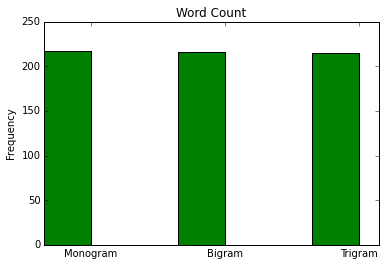

In [261]:
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
import numpy as np

#The count is done for the portion of input file.

#The relationship between monograms, bigrams and trigrams is, every time bigram count is one less than monogram,
#and trigram is two less than monogram.


#The FrequencyCount runner file write the map reduce job results to a 'result.txt' and I am using data from this 
#result file to draw the graph.

f = open('result.txt')
for line in f.readlines():
    if 'bigram' in line:
        bigrams=int(line.split()[-1])
        print 'Bigrams ',bigrams
    elif 'trigram' in line:
        trigrams=int(line.split()[-1])
        print 'Trigrams ',trigrams
    else:
        monograms=int(line.split()[-1])
        print 'Monograms ',monograms
N = 3
WordFrequency = (monograms,bigrams,trigrams)


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, WordFrequency, width, color='g')


# add some text for labels, title and axes ticks
ax.set_ylabel('Frequency')
ax.set_title('Word Count')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Monogram', 'Bigram', 'Trigram') )
plt.show

f.close()